![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Matemática Computacional

## Interpolação

- Professor: Felipe Reis


---
### Importação de bibliotecas 

In [1]:
from __future__ import division
import scipy as sp
import numpy as np
from numpy import linalg
from scipy import interpolate
from numpy.polynomial import polynomial as poly
import matplotlib.pyplot as plt

---
### Interpolação Polinomial

Podemos encontrar o polinômio interpolador e esboçar seu gráfico usando a sequência de comandos abaixo.

#### Exemplo (Polinômio Simples)

Exemplo 6.1.1, do [livro texto](https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/livro-py.pdf).

Encontre o polinômio interpolador do conjunto de pontos {(0, 1), (1, 6), (2, 5), (3, −8)}

Podemos representar esses pontos na forma de x e y.

In [2]:
xi = np.array([0, 1, 2, 3], dtype='double')
yi = np.array([1, 6, 5, -8], dtype='double')

print(xi)
print(yi)

[0. 1. 2. 3.]
[ 1.  6.  5. -8.]


Podemos plotar os pontos a serem interpolados, usando os comandos abaixo.

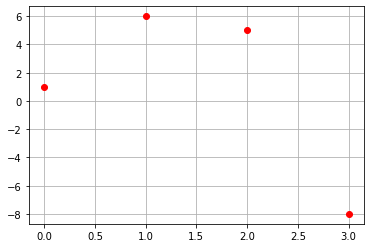

In [3]:
plt.plot(xi, yi,'ro') #'ro' = red (vermelho) + circulo ;
plt.grid()
plt.show()

De acordo com o Teorema da Interpolação Polinomial, para um conjunto de $n$ pontos, é necessário um polinômio de ordem $n-1$.

Como temos 4 pontos, é necessária uma função de ordem 3 

$$f(x) = a_3 x^3 + a_2 x^2 + a_1 x^1 + a_0 x^0$$

Para que possamos representar esse polinômio, temos que $p(x_i) = y_i$, onde $i = 0, 1, 2, 3$, gerando o seguinte sistema linear

$a_0 = 1$

$a_3 + a_2 + a_1 + a_0 = 6$

$8 a_3 + 4 a_2 + 2 a_1 + a_0 = 5$

$27 a_3 + 9 a_2 + 3 a_1 + a_0 = -8$

Após transformar em um sistema linear, temos:

In [4]:
A = np.array([xi**3, xi**2, xi**1, xi**0]).transpose()
print('A =\n', A)
print()
print('b=\n', yi.reshape(-1,1))

A =
 [[ 0.  0.  0.  1.]
 [ 1.  1.  1.  1.]
 [ 8.  4.  2.  1.]
 [27.  9.  3.  1.]]

b=
 [[ 1.]
 [ 6.]
 [ 5.]
 [-8.]]


Conseguimos resolver o sistema linear, usando o comando `np.linalg.solve`, conforme vimos na solução de Sistemas Lineares.

In [5]:
np.set_printoptions(precision=3, suppress=True) #comando para impressão de array com 3 casas decimais
S = np.linalg.solve(A, yi) #comando para solução de sistemas lineares
print(S)

[-1. -0.  6.  1.]


Com isso temos como resultado o seguinte polinômio:
$$f(x) = -x^3 + 6 x^1 + 1$$

Para representação de uma função $f(x)$ podemos utilizar a função `np.polyval`.

Esse comando é capaz de representar um função $f(x) = a_n x^n + ... + a_1 x^1 + a_0 x^0$. 

Desse modo, podemos representar o polinômio na função e representá-lo usando um gráfico.

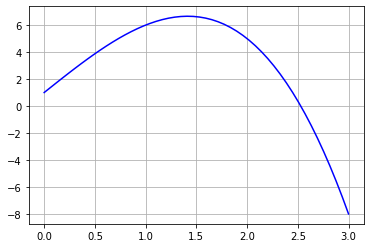

In [6]:
interv = np.linspace(0,3)
plt.plot(interv, np.polyval(S,interv), 'b-') # 'b-' = blue (azul) + linha
plt.grid()
plt.show()

Para podermos ver o gráfico junto aos pontos, podemos alterar ligeiramente o intervalo (para melhorar a exibição das informações) e plotar o gráfico do polinômio e dos pontos interpolados. 

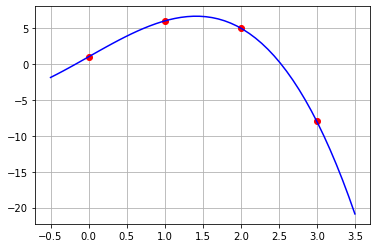

In [7]:
interv = np.linspace(-0.5, 3.5)
plt.plot(xi, yi,'ro', interv, np.polyval(S,interv), 'b-') #'ro' = red + circulo ; 'b-' = blue + linha
plt.grid()
plt.show()

---

### Polinômios de Lagrange

Exemplo 6.3.1, do [livro texto](https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/livro-py.pdf).

Encontre um polinômio interpolador de Lagrange que passa pelos pontos (0, 0), (1, 1), (2, 4) e (3, 9). Calcule numericamente, f(4).

Podemos representar esses pontos na forma de x e y.

In [8]:
xi = np.array([0, 1, 2, 3], dtype='double')
yi = np.array([0, 1, 4, 9], dtype='double')

print(xi)
print(yi)

[0. 1. 2. 3.]
[0. 1. 4. 9.]


In [9]:
x = 4 #f(4)
L0 = ((4 - 1)*(4 - 2)*(4 - 3))/((0 - 1)*(0 - 2)*(0 - 3))
L1 = ((4 - 0)*(4 - 2)*(4 - 3))/((1 - 0)*(1 - 2)*(1 - 3))
L2 = ((4 - 0)*(4 - 1)*(4 - 3))/((2 - 0)*(2 - 1)*(2 - 3))
L3 = ((4 - 0)*(4 - 1)*(4 - 2))/((3 - 0)*(3 - 1)*(3 - 2))

px = (yi[0] * L0) + (yi[1] * L1) + (yi[2] * L2) + (yi[3] * L3)
print(px)

16.0


In [10]:
x = 4 #f(4)
L0 = ((x - xi[1])*(x - xi[2])*(x - xi[3]))/((xi[0] - xi[1])*(xi[0] - xi[2])*(xi[0] - xi[3]))
L1 = ((x - xi[0])*(x - xi[2])*(x - xi[3]))/((xi[1] - xi[0])*(xi[1] - xi[2])*(xi[1] - xi[3]))
L2 = ((x - xi[0])*(x - xi[1])*(x - xi[3]))/((xi[2] - xi[0])*(xi[2] - xi[1])*(xi[2] - xi[3]))
L3 = ((x - xi[0])*(x - xi[1])*(x - xi[2]))/((xi[3] - xi[0])*(xi[3] - xi[1])*(xi[3] - xi[2]))

px = (yi[0] * L0) + (yi[1] * L1) + (yi[2] * L2) + (yi[3] * L3)
print(px)

16.0


In [11]:
####################################
## Interpolação da Lagrange
####################################

#parâmetros de entrada
# * xi - vetor de pontos x
# * yi - vetor de pontos y
# * x - ponto a ser interpolado
# parâmetros de saída
# * px - valor calculado pelo polinômio de lagrange

def lagrange(xi, yi, x):
    assert(len(xi) == len(yi)), "Erro: Tamanho do vetor xi é diferente de yi"
    
    #declaração de variáveis px e L
    px, L = 0, 0
    
    #calcula os valores de L0,...,Ln
    for i in range(0, len(xi)):
        lnum, lden = 1, 1 #inicialização do valor de L
        
        #j corresponde aos outros elementos
        for j in range(0, len(xi)):
            if i != j:
                lnum *= (x - xi[j])
                lden *= (xi[i] - xi[j])
            
        L = lnum / lden
        px += (yi[i] * L)
               
    return px

In [12]:
xi = np.array([0, 1, 2, 3], dtype='double')
yi = np.array([0, 1, 4, 9], dtype='double')

px = lagrange(xi, yi, 4)
print(px)

16.0


In [13]:
xi = np.array([1.6, 2.5, 3., 4.2, 5.4, 6.7], dtype='double')
yi = np.array([-1.5, -2.1, 0.3, 1.4, 2.1, 3.9], dtype='double')
px = lagrange(xi, yi, 2)
print(px)

-3.6688456271033405


---
### Polinômios de Newton (Diferenças Divididas de Newton)


In [14]:
####################################
## Polinômios de Newton
####################################

#parâmetros de entrada
# * xi - vetor de pontos x
# * yi - vetor de pontos y
# * x - ponto a ser interpolado
# parâmetros de saída
# * px - valor calculado pelo polinômio de newton

def diff_newton(xi, yi, x):
    assert(len(xi) == len(yi)), "Erro: Tamanho do vetor xi é diferente de yi"
    
    #declaração de variáveis
    coef = []             # coeficientes
    yt = yi               # y temporario, para armazenamento de delta
    num_diff = len(xi)-1  # número de diferenças divididas
    px = 0                # polinômio px
    
    #adiciona o primeiro valor yi0 como coeficiente da equação
    coef.append(yi[0])
    
    #calcula os coeficientes de diferenças divididas
    for i in range(0, num_diff):
        delta = [] #variável para armazenamento temporário de cálculo da diferença (equivalente coluna da tabela)
        
        #percorre diferenças yt (o número de diferenças se reduz ao longo da execução de n-1 até 1)
        for j in range(0, len(yt)-1):
            delta.append((yt[j+1] - yt[j]) / (xi[j+i+1] - xi[j]))
        
        yt = delta.copy()
        coef.append(yt[0])

    #calcula a equação (numericamente), percorrendo o vetor de coeficientes
    for i in range(0, len(coef)):
        pn = coef[i]
        
        #realiza n-i multiplicações, dependendo do grau do polinômio
        for j in range(0, i):
            pn *=(x - xi[j])
            
        px += pn
   
    return px

In [15]:
xi = np.array([-1, 0, 1, 3], dtype='double')
yi = np.array([3, 1, 3, 43], dtype='double')

px = diff_newton(xi, yi, -1)
print(px)

3.0


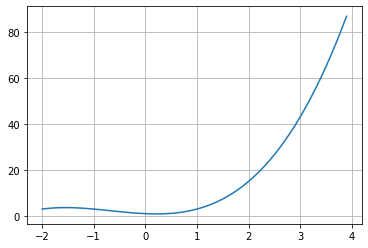

In [16]:
x, y = [], []
for i in np.arange(np.min(xi)-1, np.max(xi)+1, 0.1):
    x.append(i)
    y.append(diff_newton(xi, yi, i))

plt.plot(x, y)
plt.grid()
plt.show()

In [17]:
xi = np.array([.0, 0.2, .3, .4, .7, .9], dtype='double')
yi = np.array([3., 2.76, 2.655, 2.6, 3.035, 4.125], dtype='double')

px = diff_newton(xi, yi, 0.7)
print(px)

3.035


---
### Interpolação Segmentada

In [18]:
####################################
## Interpolação Segmentada
####################################

#parâmetros de entrada
# * xi - vetor de pontos x
# * yi - vetor de pontos y
# * x - ponto a ser interpolado
# parâmetros de saída
# * px - vetor de segmentos

def interp_segmentada(xi, yi, x):
    assert(len(xi) == len(yi)), "Erro: Tamanho do vetor xi é diferente de yi"
    assert(x >= xi[0] and x <= xi[-1]), "Erro: valor de x está fora do limite dos pontos xi"
    
    #declaração de variáveis px
    px = -1
    i = -1
    
    #obtem indice de cálculo
    for j in range(0, len(xi)-1):
        if(x >= xi[j] and x <= xi[j+1]): 
            i = j
            break
                
    #se um intervalo foi encontrado
    if(i >= 0):
        p1 = (yi[i] * (xi[i+1] - x)) / (xi[i+1] - xi[i])
        p2 = (yi[i+1] * (x - xi[i])) / (xi[i+1] - xi[i])
        px = p1 + p2
               
    return px

In [24]:
xi = np.array([0., 1., 2., 3., 4., 5.], dtype='double')
yi = np.array([0., 4., 3., 0., 2., 0.], dtype='double')

px = interp_segmentada(xi, yi, 2.5)
print(px)

4.0


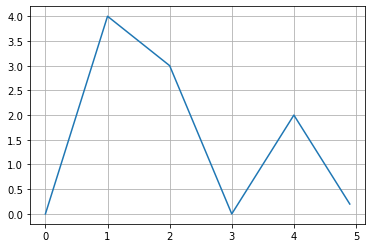

In [20]:
x, y = [], []
for i in np.arange(np.min(xi), np.max(xi), 0.1):
    x.append(i)
    y.append(interp_segmentada(xi, yi, i))

plt.plot(x, y)
plt.grid()
plt.show()

---
### Interpolação com Scipy

A documentação dos métodos de interpolação usando Scipy podem ser encontrados no link abaixo:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.make_interp_spline.html#scipy.interpolate.make_interp_spline

#### Interpolação de Lagrange

Para realizar a interpolação de Lagrande usando o Scipy, execute o comando abaixo

```
sp.interpolate.lagrange
```

A documentação da interpolação de Lagrange pode ser encontrada no link abaixo:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html

Diferentemente do método construído, a interpolação de Lagrange disponibilizada no Scipy necessita da definição da função interpoladora, ao invés de apenas os pontos de referência.

In [21]:
# no exemplo abaixo, a função x**3 é interpolada com 3 pontos
x = np.array([0, 1, 2])
y = x**3
polinomio = interpolate.lagrange(x, y)
coefs = poly.Polynomial(polinomio).coef
print(coefs)

[ 3. -2.  0.]


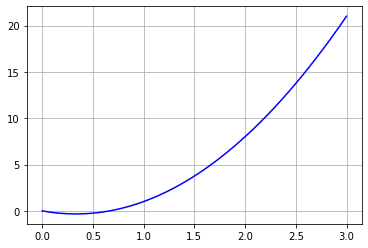

In [22]:
interv = np.linspace(0,3)
plt.plot(interv, np.polyval(coefs, interv), 'b-') # 'b-' = blue (azul) + linha
plt.grid()
plt.show()